In [10]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [25]:
image_shape = (150,150,3)
kernel_size = (3, 3)

In [26]:
# model = Sequential()

# model.add(Conv2D(32, kernel_size, activation='relu', input_shape=image_shape))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, kernel_size, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, kernel_size, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, kernel_size, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(13, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
# #adam, rmsprop, sgd, 

In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size, activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(13, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 36992)             0         
__________

In [51]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('cropped_faces/Output/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
test_image_gen = image_gen.flow_from_directory('cropped_faces/Output/val',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 486 images belonging to 13 classes.
Found 64 images belonging to 13 classes.


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
# adam 80% accuracy at 20 epochs
# adam 87-90% accuracy at 50 epochs
# adam 56% accuracy at 5 epochs
# adam 94% accuracy full_picture at 20 epochs
# rmsprop 85% at 20 epochs
# sgd 58% at 20 epochs
# rmsprop 4 cov2d 69% 10 epochs
# adam 3 conv2d 84% 10 epochs
# adam 3 conv2d 92% 20 epochs
results = model.fit_generator(train_image_gen,epochs=20,
                              steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=20)

Epoch 1/20
50/50 [==============================] - 27s 535ms/step - loss: 2.5061 - acc: 0.1345 - val_loss: 2.1518 - val_acc: 0.2969
Epoch 2/20
50/50 [==============================] - 23s 461ms/step - loss: 1.8064 - acc: 0.4237 - val_loss: 1.5353 - val_acc: 0.5156
Epoch 3/20
50/50 [==============================] - 23s 455ms/step - loss: 1.4588 - acc: 0.5216 - val_loss: 1.0434 - val_acc: 0.7188
Epoch 4/20
50/50 [==============================] - 23s 455ms/step - loss: 1.0566 - acc: 0.6646 - val_loss: 0.8700 - val_acc: 0.7344
Epoch 5/20
50/50 [==============================] - 23s 456ms/step - loss: 0.8667 - acc: 0.7130 - val_loss: 0.6773 - val_acc: 0.7969
Epoch 6/20
50/50 [==============================] - 23s 451ms/step - loss: 0.6398 - acc: 0.8138 - val_loss: 0.3887 - val_acc: 0.8438
Epoch 7/20
50/50 [==============================] - 24s 473ms/step - loss: 0.6695 - acc: 0.7996 - val_loss: 0.4847 - val_acc: 0.7969
Epoch 8/20
50/50 [==============================] - 23s 461ms/step - 

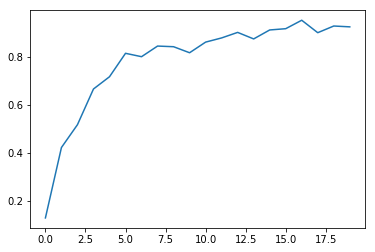

In [54]:
plt.plot(results.history['acc'])

In [55]:
model.save('adam_face_20epochs.h5')

In [56]:
classes = {0: 'Akhmedov Sanzhar',
 1: 'Alikhan Zhamankhan',
 2: 'Baibatchayeva Anar',
 3:'Daniyar Raiymbekov',
 4: 'Duisenov Alikhan',
 5: 'Kenzhebay Askar',
 6: 'Kyran Yerkin',
 7: 'Maxat Ualikhan',
 8: 'Naryshov Ernar',
 9: 'Rysmambetov Nurtugan',
 10: 'Sagynbek Nurbolat',
 11: 'Zhetessov Nur',
 12: 'Zhumabekov Magjan'}

import numpy as np
from keras.preprocessing import image

dog_file = 'cropped_faces/Output/test/Zhumabekov Magjan/cv_40.jpg_480_106.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255
prediction_prob = model.predict(dog_img)
max_res = max(prediction_prob[0])
max_text = str(int(max_res*100))+'%'
i = np.where(prediction_prob[0] == max_res)
print(classes[int(i[0])], max_res)

Zhumabekov Magjan 0.99943084
